# **1. Import Library**

In [1]:
library(ggplot2)
library(cowplot)
library(recipes)
library(stats)
library(themis)
library(caret)
library(plyr)
library(ggcorrplot)
install.packages("pROC")
library(pROC)

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘recipes’


The following object is masked from ‘package:stats’:

    step



Attaching package: ‘themis’


The following objects are masked from ‘package:recipes’:

    step_downsample, step_upsample


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:httr’:

    progress


------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from

# **2. Import Data**

#### Import data by using the **read.csv()** function and using the **head()** function to get first 6 record on data. 

In [2]:
telco_df = read.csv("../input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
head(telco_df)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,⋯,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,⋯,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,⋯,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,⋯,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
5,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,⋯,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
6,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,⋯,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes


#### The data set includes information about:
#### Customers who left within the last month – the column is called Churn Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
#### Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
#### Demographic info about customers – gender, age range, and if they have partners and dependents

#### Using function **as.data.frame()** set argument StringsAsFactors = TRUE convert the string column's data type to a factor and using function **as.factor()** to convert the data type of SeniorCitizen column from int to a factor and using function **str()** to compactly displaying the internal structure of telco_df.

In [3]:
telco_df <- as.data.frame(unclass(telco_df),stringsAsFactors=TRUE)
telco_df['SeniorCitizen'] = as.factor(telco_df$SeniorCitizen)
str(telco_df)

'data.frame':	7043 obs. of  21 variables:
 $ customerID      : Factor w/ 7043 levels "0002-ORFBO","0003-MKNFE",..: 5376 3963 2565 5536 6512 6552 1003 4771 5605 4535 ...
 $ gender          : Factor w/ 2 levels "Female","Male": 1 2 2 2 1 1 2 1 1 2 ...
 $ SeniorCitizen   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Partner         : Factor w/ 2 levels "No","Yes": 2 1 1 1 1 1 1 1 2 1 ...
 $ Dependents      : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 2 1 1 2 ...
 $ tenure          : int  1 34 2 45 2 8 22 10 28 62 ...
 $ PhoneService    : Factor w/ 2 levels "No","Yes": 1 2 2 1 2 2 2 1 2 2 ...
 $ MultipleLines   : Factor w/ 3 levels "No","No phone service",..: 2 1 1 2 1 3 3 2 3 1 ...
 $ InternetService : Factor w/ 3 levels "DSL","Fiber optic",..: 1 1 1 1 2 2 2 1 2 1 ...
 $ OnlineSecurity  : Factor w/ 3 levels "No","No internet service",..: 1 3 3 3 1 1 1 3 1 3 ...
 $ OnlineBackup    : Factor w/ 3 levels "No","No internet service",..: 3 1 3 1 1 1 3 1 1 3 ...
 $ DeviceProtection: Fa

#### Using the **nrow()** function to get the number of rows of telco_df.

In [4]:
nrow(telco_df)

[1] 7043

#### The telco data set has 7043 rows.

#### Using the **ncol()** function to get the number of columns of telco_df.

In [5]:
ncol(telco_df)

[1] 21

#### The telco data set has 21 columns.

# **3. Cleaning Data**

#### Using the **is.na()** function to check missing value and using **sum()** to get number of all missing values.

In [6]:
sum(is.na(telco_df))

[1] 11

#### The telco data set has 11 missing values.

#### Using the **na.omit()** function to remove missing values in telco_df and using the **nrow()** function to get the number of rows of telco_df after remove missing values.

In [7]:
telco_df = na.omit(telco_df)
print(nrow(telco_df))

[1] 7032


#### The telco data set after remove missing values has 7032 rows.

# **4. Explotary Data Analysis**

#### Using the **ggplot2** package to helpful commands to create complex plots from data in a data frame.

#### 1. What number of customers who left within the last month ?

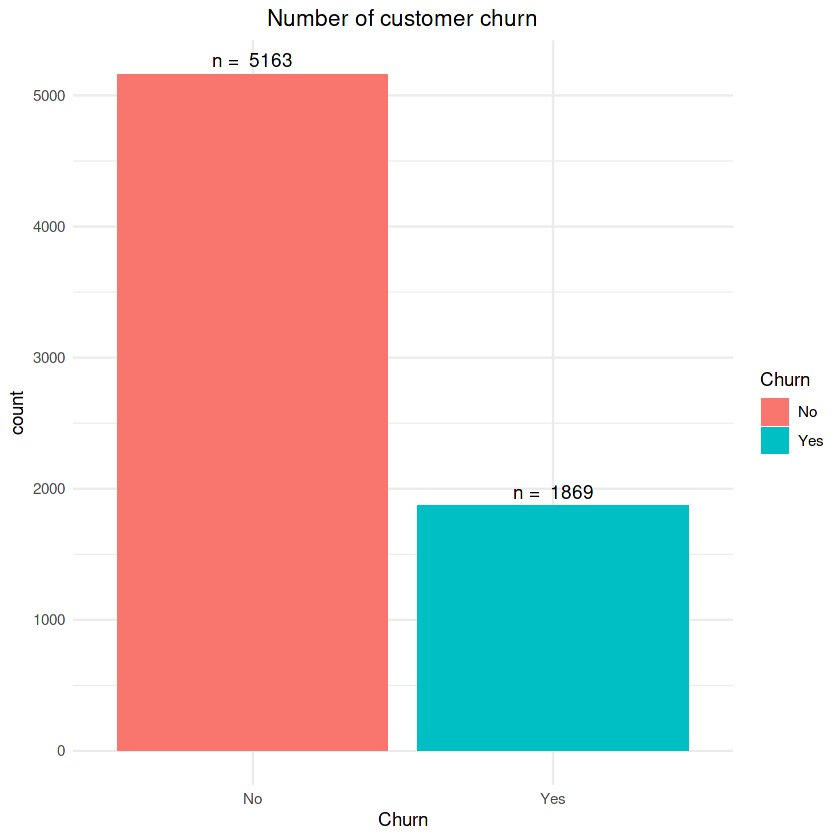

In [8]:
ggplot(data = telco_df , aes(x = Churn,fill = Churn)) + geom_bar()  + geom_text(stat = 'count' , aes(label = paste("n = " , formatC(..count..))),vjust = -0.5) + theme_minimal() + ggtitle("Number of customer churn") + theme(plot.title = element_text(hjust = 0.5))

#### The number of churn and no-churn customers is an imbalance of just having 1869 churn customers from all 7032 customers.

#### 2. What distribution of MonthlyCharges ?

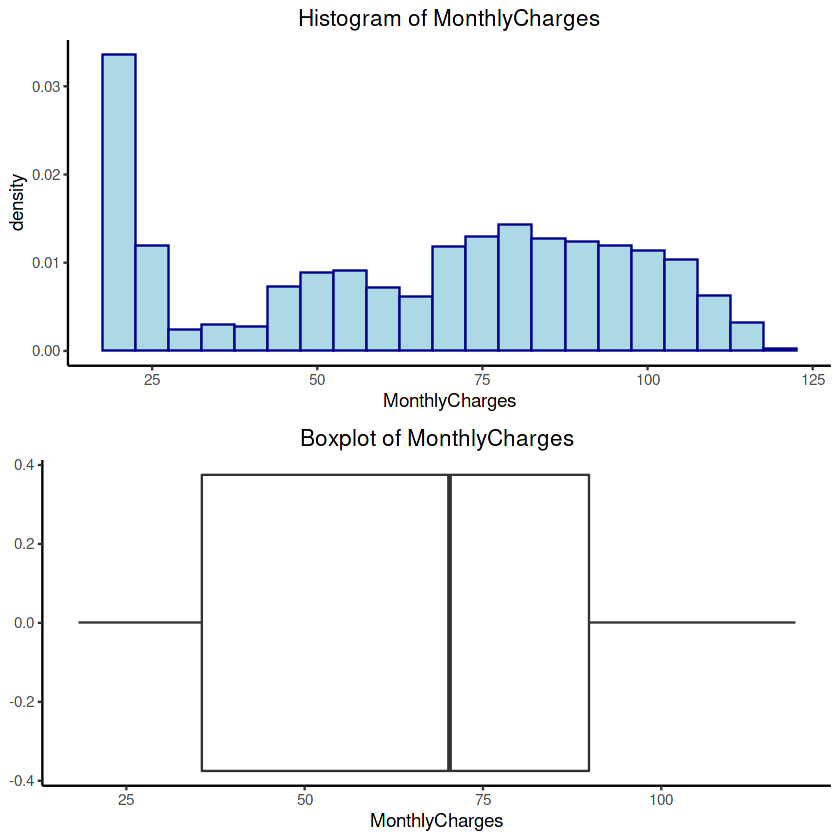

In [9]:
g1 <- ggplot(data = telco_df , aes(x = MonthlyCharges)) + geom_histogram(aes(y = ..density..),color = "darkblue",fill="lightblue" , binwidth = 5) + theme_classic() + ggtitle("Histogram of MonthlyCharges") + theme(plot.title = element_text(hjust = 0.5))
g2 <- ggplot(data = telco_df , aes(x = MonthlyCharges)) + geom_boxplot() + theme_classic() + ggtitle("Boxplot of MonthlyCharges") + theme(plot.title = element_text(hjust = 0.5))
print(plot_grid(g1,g2, ncol = 1, nrow = 2))

#### MonthlyCharges have right-skewed distribution and most customers are pay monthly charges less than 25 USD/Month.

#### 3. What distribution of tenue ?

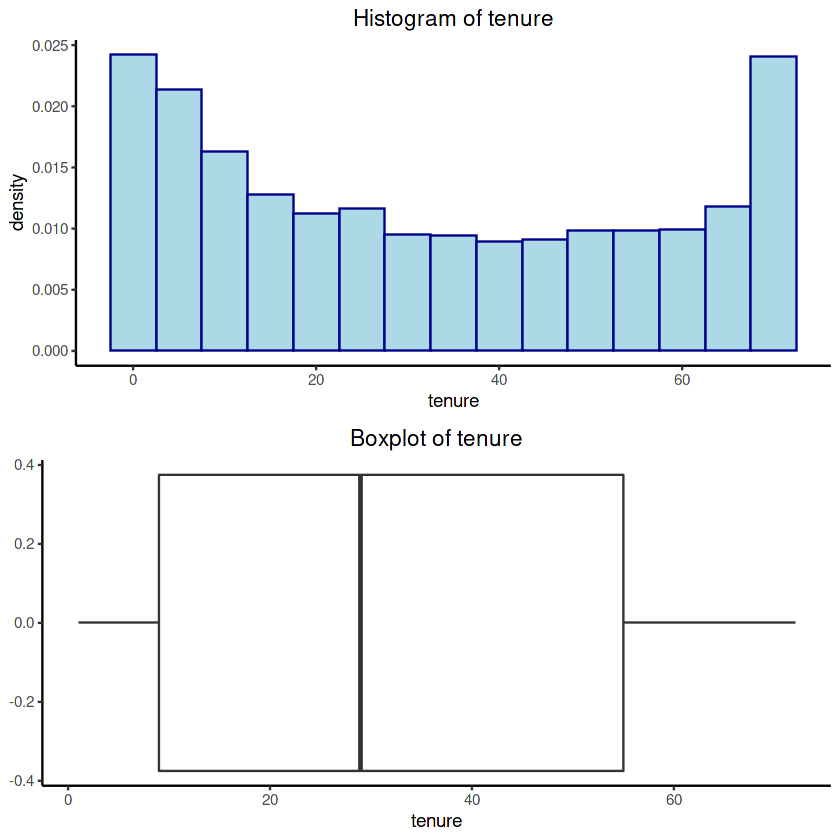

In [10]:
g1 <- ggplot(data = telco_df , aes(x = tenure)) + geom_histogram(aes(y = ..density..),color = "darkblue",fill="lightblue" , binwidth = 5) + theme_classic() + ggtitle("Histogram of tenure") + theme(plot.title = element_text(hjust = 0.5))
g2 <- ggplot(data = telco_df , aes(x = tenure)) + geom_boxplot() + theme_classic() + ggtitle("Boxplot of tenure") + theme(plot.title = element_text(hjust = 0.5))
print(plot_grid(g1,g2, ncol = 1, nrow = 2))

#### The tenue of customers have non-symmetric distribution.

#### 4. What is median monthly charges of churn customers ?

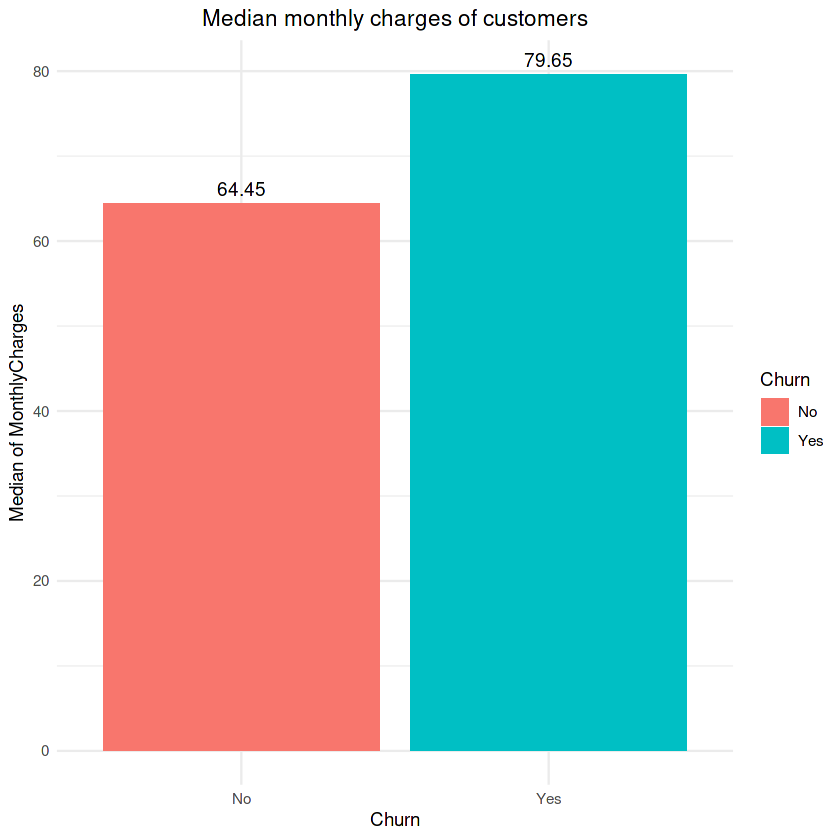

In [11]:
ggplot(data = telco_df , aes(x = Churn , y = MonthlyCharges, fill = Churn)) + geom_bar(stat = "summary" , fun = "median")  +
stat_summary(aes(label = paste(..y..)) , fun = median , geom = "text" , vjust = -0.5) + labs( y = "Median of MonthlyCharges") +
ggtitle("Median monthly charges of customers") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### The median monthly charges for churn customers are more than no-churn customers around 15 USD/Month.

#### 5. What is median tenure of churn customers with telco ?

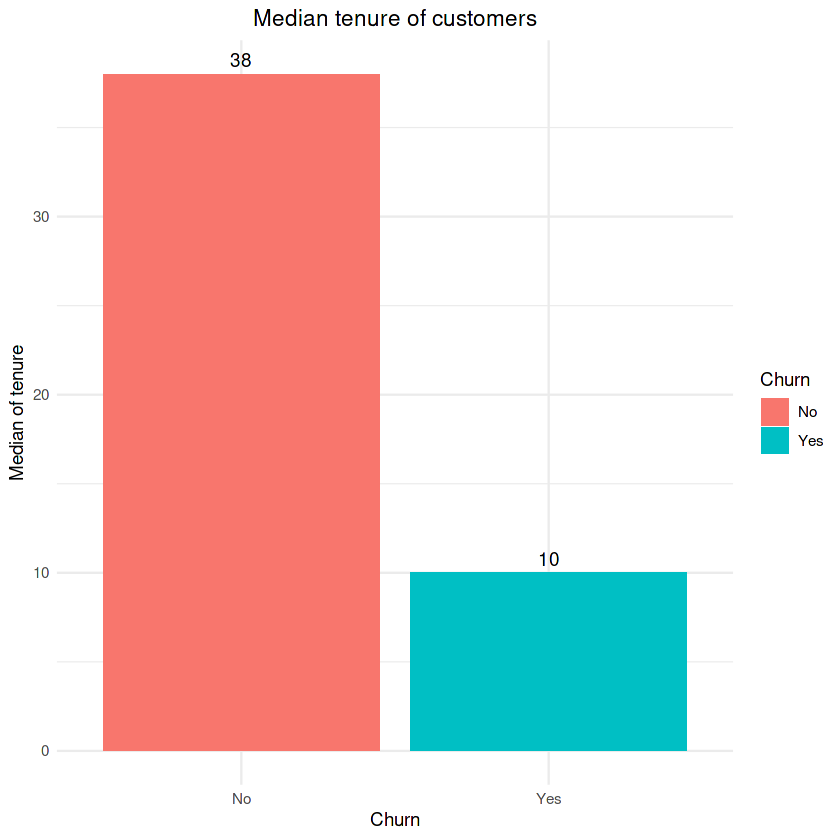

In [12]:
ggplot(data = telco_df , aes(x = Churn , y = tenure, fill = Churn)) + geom_bar(stat = "summary" , fun = "median")  +
stat_summary(aes(label = paste(..y..)) , fun = median , geom = "text" , vjust = -0.5) + labs( y = "Median of tenure") +
ggtitle("Median tenure of customers") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### The median tenure for churn customers with telco is less than 1 year (10 months).

#### 6. What type of internet services do customers have ?

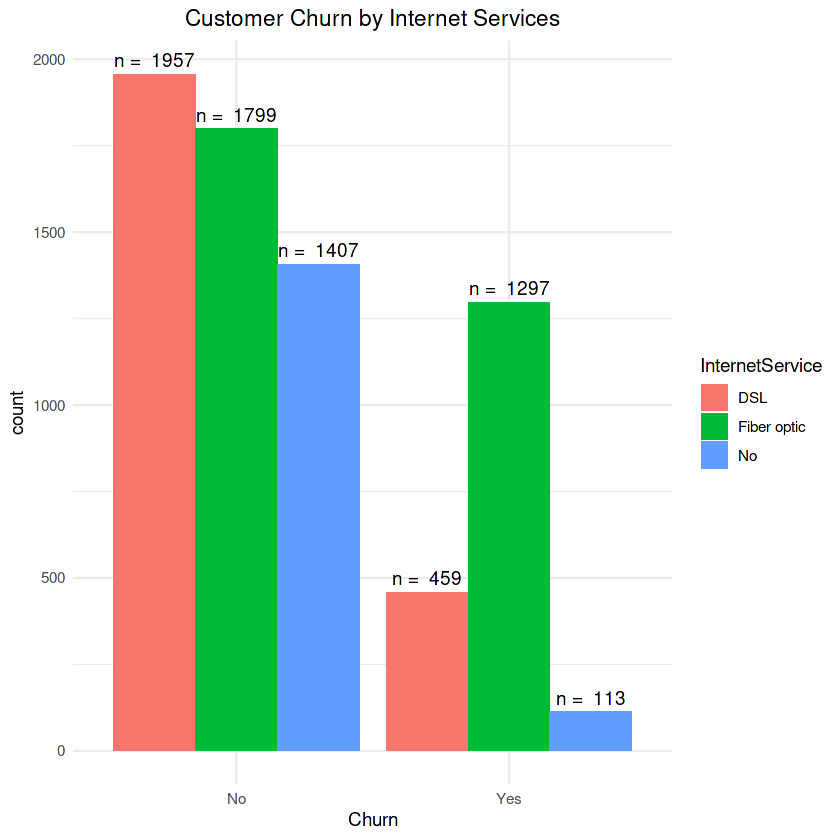

In [13]:
ggplot(data = telco_df, aes(x = Churn,fill = InternetService)) + geom_bar(stat = "count",position = position_dodge()) + geom_text(stat = "count" , aes(label = paste("n = " , formatC(..count..))),vjust = -0.5 , position = position_dodge(0.9)) + ggtitle("Customer Churn by Internet Services") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### The number of churn customers is less than no-churn customers for all 3 Internet services (DSL, Fiber optic, No internet service) However, the number of churn customers mostly using fiber optic is 1297 customers(68% of all churn customers).

#### 7. What type of contract services do customers have ?

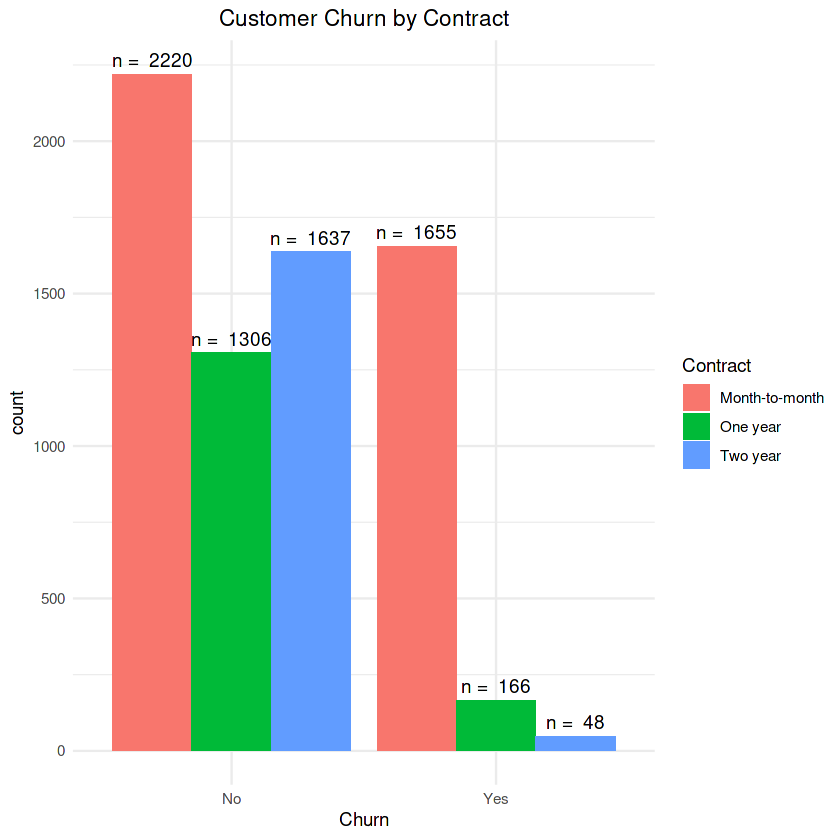

In [14]:
ggplot(data = telco_df, aes(x = Churn,fill = Contract)) + geom_bar(stat = "count",position = position_dodge()) + geom_text(stat = "count" , aes(label = paste("n = " , formatC(..count..))),vjust = -0.5 , position = position_dodge(0.9)) + ggtitle("Customer Churn by Contract") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### The number of churn customers is less than no-churn customers for all 3 contract services (Month-to-month, One year, Twoyear) However, the number of churn customers mostly using month-to-month is 1655 customers(89% of all churn customers).

#### 8. What a number of churn cutomers by gender ?

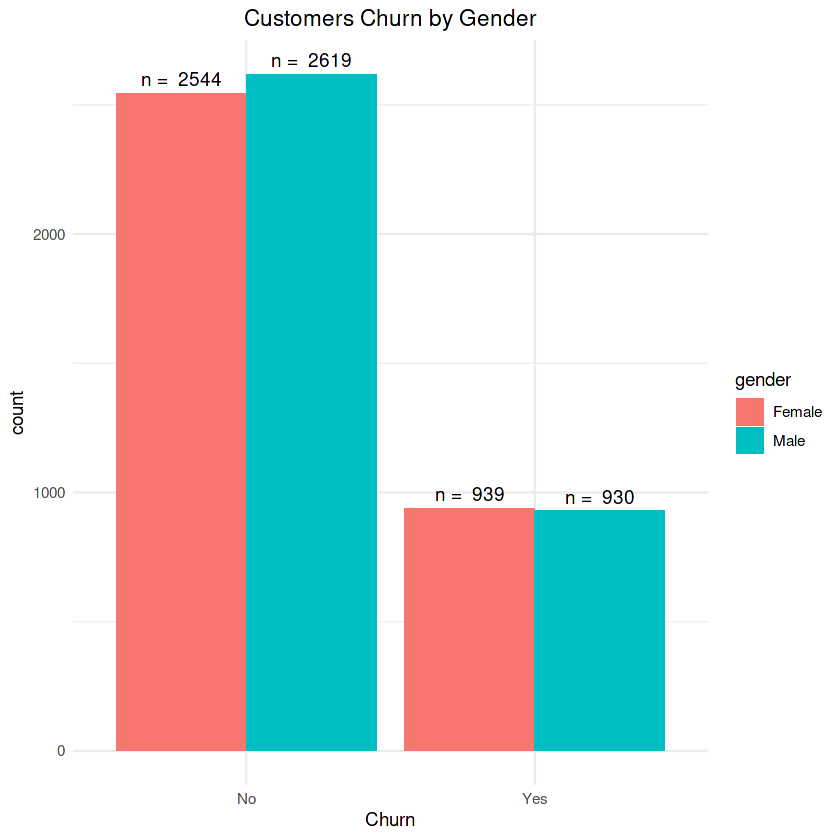

In [15]:
ggplot(data = telco_df, aes(x = Churn,fill = gender)) + geom_bar(stat = "count",position = position_dodge()) + geom_text(stat = "count" , aes(label = paste("n = " , formatC(..count..))),vjust = -0.5 , position = position_dodge(0.9)) + ggtitle("Customers Churn by Gender") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### An approximate number of churn is shown both when a customer is a male or a female.

#### 9. What a number of churn cutomers by senior citizen ?

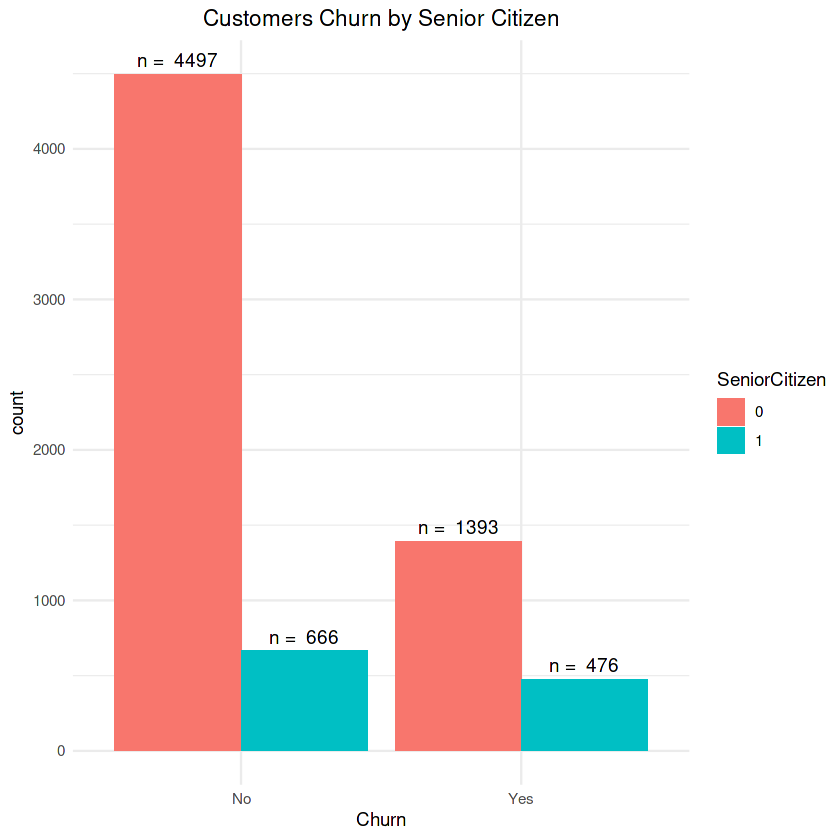

In [16]:
ggplot(data = telco_df, aes(x = Churn, fill = SeniorCitizen)) + geom_bar(stat = "count",position = position_dodge()) + geom_text(stat = "count" , aes(label = paste("n = " , formatC(..count..))),vjust = -0.5 , position = position_dodge(0.9)) + ggtitle("Customers Churn by Senior Citizen") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### The number of senior citizens is less than non-senior citizens both churn customers and no-churn customers.

#### 10. What a number of churn cutomers by payment method ?

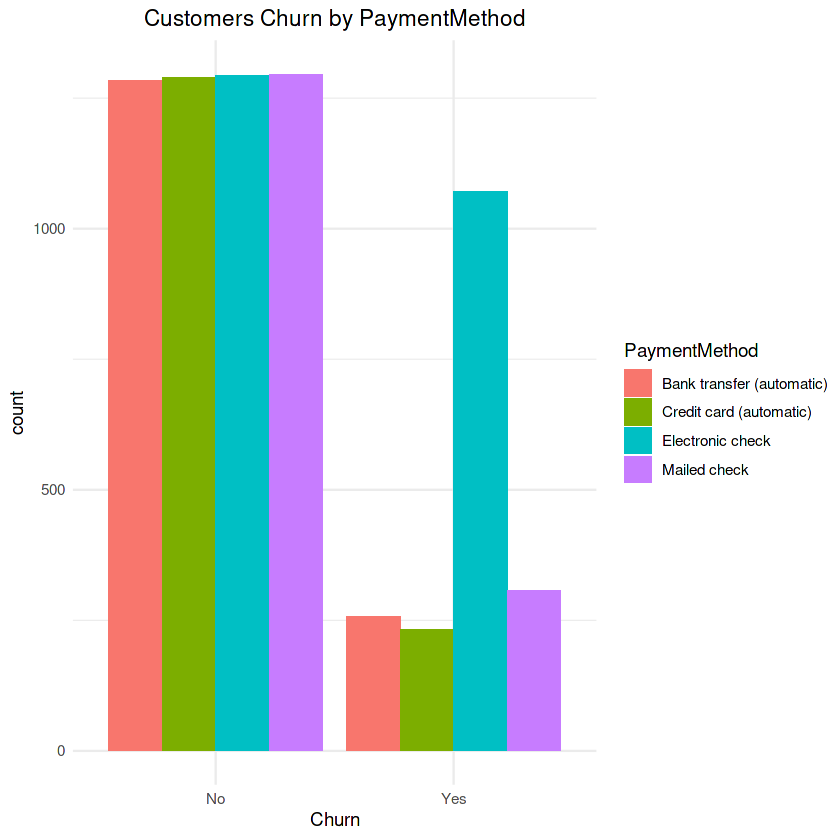

In [17]:
ggplot(data = telco_df, aes(x = Churn,fill = PaymentMethod)) + geom_bar(stat = "count",position = position_dodge()) +
ggtitle("Customers Churn by PaymentMethod") + theme_minimal() + theme(plot.title = element_text(hjust = 0.5))

#### The number of non-churn customers has approximately equal to all 4 payment methods. However, The churn customers have most payment methods by electronic check.

# **5. Feature Selection**

#### Using the **chisq.test()** function to test correlation between Churn and each categorical variables(except CustomerID)

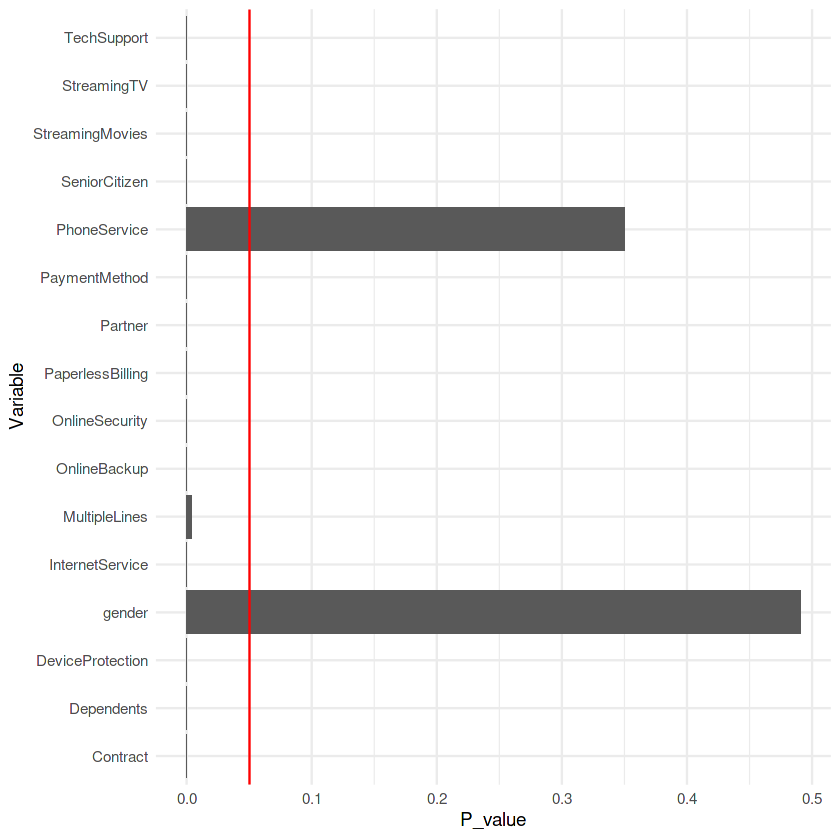

In [18]:
x_categorical <- subset(telco_df , select  = -c(tenure,MonthlyCharges,TotalCharges))
chisq_test <- lapply(x_categorical[2:17] , function(x) chisq.test(x_categorical[,18] , x)$p.value)
df_chisq_test = ldply(chisq_test,data.frame)
names(df_chisq_test)[1] <- "Variable"
names(df_chisq_test)[2] <- "P_value"
ggplot(data = df_chisq_test , aes(y = Variable , x = P_value)) + geom_bar(stat = "identity") + geom_vline(xintercept = 0.05 ,color = 'red') + theme_minimal()

#### Considering a significance level alpha = 0.05 , **SeniorCitizen** , **Partner** , **Dependents** , **MultipleLines** , **InternetService** , **OnlineSecurity** , **OnlineBackup** , **DeviceProtection** , **TechSupport** , **StreamingTV** , **Contract** , **PaperlessBilling** and **PaymentMethod** are significant.

#### Using the **t.test()** function to test difference in means of churn and no churn customers by tenure , MonthlyCharges and TotalCharges

In [19]:
tenure_churn = subset(telco_df , Churn == 'Yes' , select = tenure)
tenure_Nochurn = subset(telco_df , Churn == 'No' , select = tenure)
MonthlyCharges_churn = subset(telco_df , Churn == 'Yes' , select = MonthlyCharges)
MonthlyCharges_Nochurn = subset(telco_df , Churn == 'No' , select = MonthlyCharges)
TotalCharges_churn = subset(telco_df , Churn == 'Yes' , select = TotalCharges)
TotalCharges_Nochurn = subset(telco_df , Churn == 'No' , select = TotalCharges)
t.test(tenure_churn , tenure_Nochurn)
t.test(MonthlyCharges_churn , MonthlyCharges_Nochurn)
t.test(TotalCharges_churn , TotalCharges_Nochurn)


	Welch Two Sample t-test

data:  tenure_churn and tenure_Nochurn
t = -34.972, df = 4045.5, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -20.77364 -18.56811
sample estimates:
mean of x mean of y 
 17.97913  37.65001 



	Welch Two Sample t-test

data:  MonthlyCharges_churn and MonthlyCharges_Nochurn
t = 18.341, df = 4139.7, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 11.72998 14.53786
sample estimates:
mean of x mean of y 
 74.44133  61.30741 



	Welch Two Sample t-test

data:  TotalCharges_churn and TotalCharges_Nochurn
t = -18.801, df = 4042.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1130.2840  -916.8121
sample estimates:
mean of x mean of y 
 1531.796  2555.344 


#### Considering a significance level alpha = 0.05 , **Tenure** , **MonthlyCharges** and **TotalCharges** are significant.

#### Using the **cor()** function computes the correlation coefficient of tenure , MonthlyCharges and TotalCharges.

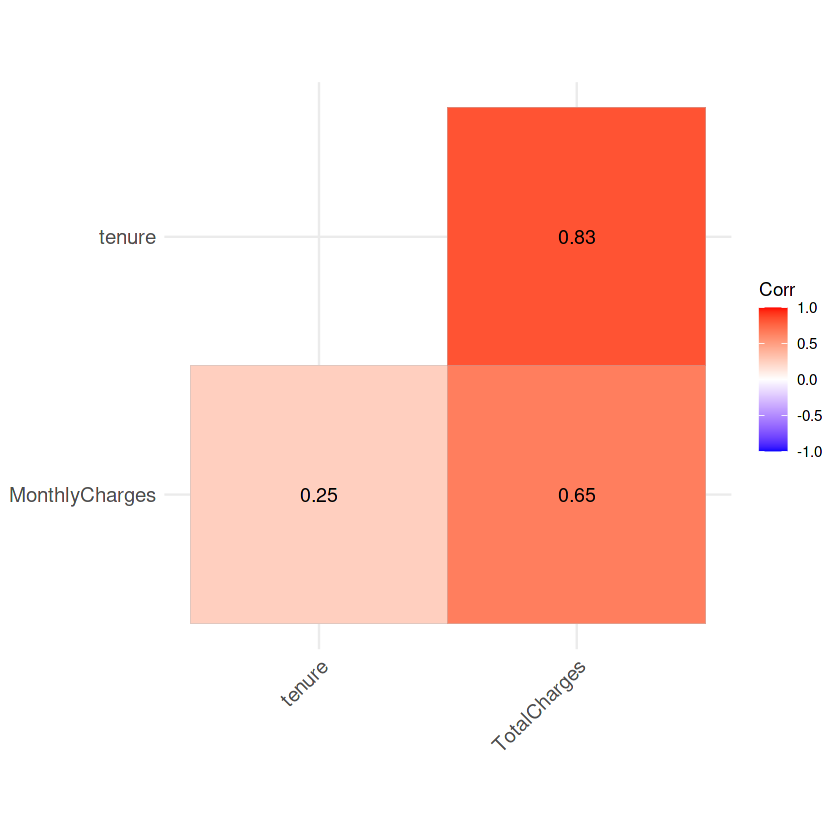

In [20]:
data_col <- telco_df[ , c('tenure','MonthlyCharges','TotalCharges')]
corr <- cor(data_col)
ggcorrplot(corr , hc.order = TRUE , type = 'lower', lab = TRUE)

#### Considering correlation values, **TotalCharges** has a strong relationship with **MonthlyCharges** and **tenure**. hence, **TotalCharges**  is excluded when train model.

# **6. Split Data**

#### Split data by using function **sample()** put into a training data(80%) and testing data(20%)

In [21]:
set.seed(99)
id <- sample(nrow(telco_df) , 0.8*nrow(telco_df))
train_df <- telco_df[id , ]
test_df <- telco_df[-id , ]

print(nrow(train_df))
print(nrow(test_df))

[1] 5625
[1] 1407


#### 5625 rows were allocated to the traning set(train_df) used to fit the machine learning model.
#### 1407 rows were allocated to the testing set(test_df) used to evaluate the fit machine learning model.

# **7. Train Model**

#### Using the **trainControl()** function to control the computational of the **train()** function. The resampling method is repeatedcv (repeated k-fold cross validation). Uses 10-fold cross validation with 3 repeats. Sampling method is Synthetic Minority Oversampling Technique(SMOTE)

In [22]:
control <- trainControl(method="repeatedcv", number=10, repeats=3, sampling = "smote")

#### Using the **train()** function to train machine learning model.

#### **Random Forest**

#### Random forests  is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time. For classification tasks, the output of the random forest is the class selected by most trees. For regression tasks, the average prediction of the individual trees is returned.

In [23]:
rf_model <- train(Churn ~ SeniorCitizen + Partner + Dependents + tenure  + 
MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies +
Contract + PaperlessBilling + PaymentMethod + MonthlyCharges, 
                      data=train_df, 
                      method='rf', 
                      preProcess = c("center", "scale") ,
                      trControl=control)
rf_predict_test <- predict(rf_model , test_df)
confusionMatrix(rf_predict_test, test_df$Churn, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  854 136
       Yes 159 258
                                          
               Accuracy : 0.7903          
                 95% CI : (0.7681, 0.8113)
    No Information Rate : 0.72            
    P-Value [Acc > NIR] : 8.89e-10        
                                          
                  Kappa : 0.4891          
                                          
 Mcnemar's Test P-Value : 0.2002          
                                          
            Sensitivity : 0.6548          
            Specificity : 0.8430          
         Pos Pred Value : 0.6187          
         Neg Pred Value : 0.8626          
              Precision : 0.6187          
                 Recall : 0.6548          
                     F1 : 0.6363          
             Prevalence : 0.2800          
         Detection Rate : 0.1834          
   Detection Prevalence : 0.2964          
      Balanced Accuracy : 0.74

#### **K-Nearest Neighbors**

#### K-Nearest Neighbors algorithm (K-NN) is a non-parametric supervised learning. It is used for classification and regression. In both cases, the input consists of the k closest training examples in a data set. The output depends on whether k-NN is used for classification or regression. Both for classification and regression, a useful technique can be to assign weights to the contributions of the neighbors, so that the nearer neighbors contribute more to the average than the more distant ones.

In [24]:
knn_model <- train(Churn~ SeniorCitizen + Partner + Dependents + tenure  + 
MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies +
Contract + PaperlessBilling + PaymentMethod + MonthlyCharges, 
                      data=train_df, 
                      method='knn',
                      preProcess = c("center", "scale") ,
                      trControl=control)
knn_predict_test <- predict(knn_model , test_df)
confusionMatrix(knn_predict_test, test_df$Churn, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  684 115
       Yes 329 279
                                          
               Accuracy : 0.6844          
                 95% CI : (0.6594, 0.7087)
    No Information Rate : 0.72            
    P-Value [Acc > NIR] : 0.9985          
                                          
                  Kappa : 0.3288          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.7081          
            Specificity : 0.6752          
         Pos Pred Value : 0.4589          
         Neg Pred Value : 0.8561          
              Precision : 0.4589          
                 Recall : 0.7081          
                     F1 : 0.5569          
             Prevalence : 0.2800          
         Detection Rate : 0.1983          
   Detection Prevalence : 0.4321          
      Balanced Accuracy : 0.69

#### **Logistic Regression**

#### Logistic Regression is a statistical model that models the probability of one event (out of two alternatives) taking place by having the log-odds (the logarithm of the odds) for the event be a linear combination of one or more independent variables (predictors).

In [25]:
logistic_model <- train(Churn ~ SeniorCitizen + Partner + Dependents + tenure  + 
MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies +
Contract + PaperlessBilling + PaymentMethod + MonthlyCharges, 
                      data=train_df, 
                      method='glmnet', 
                      preProcess = c("center", "scale"),  
                      trControl=control)
logistic_predict_test <- predict(logistic_model , test_df)
confusionMatrix(logistic_predict_test, test_df$Churn, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  756  77
       Yes 257 317
                                          
               Accuracy : 0.7626          
                 95% CI : (0.7395, 0.7846)
    No Information Rate : 0.72            
    P-Value [Acc > NIR] : 0.0001669       
                                          
                  Kappa : 0.4834          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.8046          
            Specificity : 0.7463          
         Pos Pred Value : 0.5523          
         Neg Pred Value : 0.9076          
              Precision : 0.5523          
                 Recall : 0.8046          
                     F1 : 0.6550          
             Prevalence : 0.2800          
         Detection Rate : 0.2253          
   Detection Prevalence : 0.4080          
      Balanced Accuracy : 0.77

#### **Naive Bayes**
### Naive Bayes classifiers are a family of simple probabilistic classifiers based on applying Bayes' theorem with strong (naive) independence assumptions between the features.

In [26]:
nb_model <- train(Churn ~ SeniorCitizen + Partner + Dependents + tenure + 
MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies +
Contract + PaperlessBilling + PaymentMethod + MonthlyCharges, 
                      data=train_df, 
                      method='naive_bayes', 
                      preProcess = c("center", "scale"),
                      trControl=control)
nb_predict_test <- predict(nb_model , test_df)
confusionMatrix(nb_predict_test, test_df$Churn, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  615  41
       Yes 398 353
                                          
               Accuracy : 0.688           
                 95% CI : (0.6631, 0.7121)
    No Information Rate : 0.72            
    P-Value [Acc > NIR] : 0.9963          
                                          
                  Kappa : 0.394           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8959          
            Specificity : 0.6071          
         Pos Pred Value : 0.4700          
         Neg Pred Value : 0.9375          
              Precision : 0.4700          
                 Recall : 0.8959          
                     F1 : 0.6166          
             Prevalence : 0.2800          
         Detection Rate : 0.2509          
   Detection Prevalence : 0.5338          
      Balanced Accuracy : 0.75

#### **Support Vector Machine**
#### Support-Vector Machines (SVMs) are supervised learning models with associated learning algorithms that analyze data for classification and regression analysis. SVMs maps training examples to points in space so as to maximise the width of the gap between the two categories.

In [27]:
svm_model <- train(Churn ~ SeniorCitizen + Partner + Dependents + tenure + 
MultipleLines + InternetService + OnlineSecurity + OnlineBackup + DeviceProtection + TechSupport + StreamingTV + StreamingMovies +
Contract + PaperlessBilling + PaymentMethod + MonthlyCharges, 
                      data=train_df, 
                      method='svmLinear', 
                      preProcess = c("center", "scale"),
                      trControl=control)
svm_predict_test <- predict(nb_model , test_df)
confusionMatrix(svm_predict_test, test_df$Churn, positive = "Yes", mode = "everything")

Confusion Matrix and Statistics

          Reference
Prediction  No Yes
       No  615  41
       Yes 398 353
                                          
               Accuracy : 0.688           
                 95% CI : (0.6631, 0.7121)
    No Information Rate : 0.72            
    P-Value [Acc > NIR] : 0.9963          
                                          
                  Kappa : 0.394           
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.8959          
            Specificity : 0.6071          
         Pos Pred Value : 0.4700          
         Neg Pred Value : 0.9375          
              Precision : 0.4700          
                 Recall : 0.8959          
                     F1 : 0.6166          
             Prevalence : 0.2800          
         Detection Rate : 0.2509          
   Detection Prevalence : 0.5338          
      Balanced Accuracy : 0.75

# **8. Evaluate Model**

#### Using the **plot.roc()** function to plot ROC curve represents the probability curve of the values whereas the AUC is the measure of separability of the different groups of values.

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases

Setting levels: control = No, case = Yes

Setting direction: controls < cases



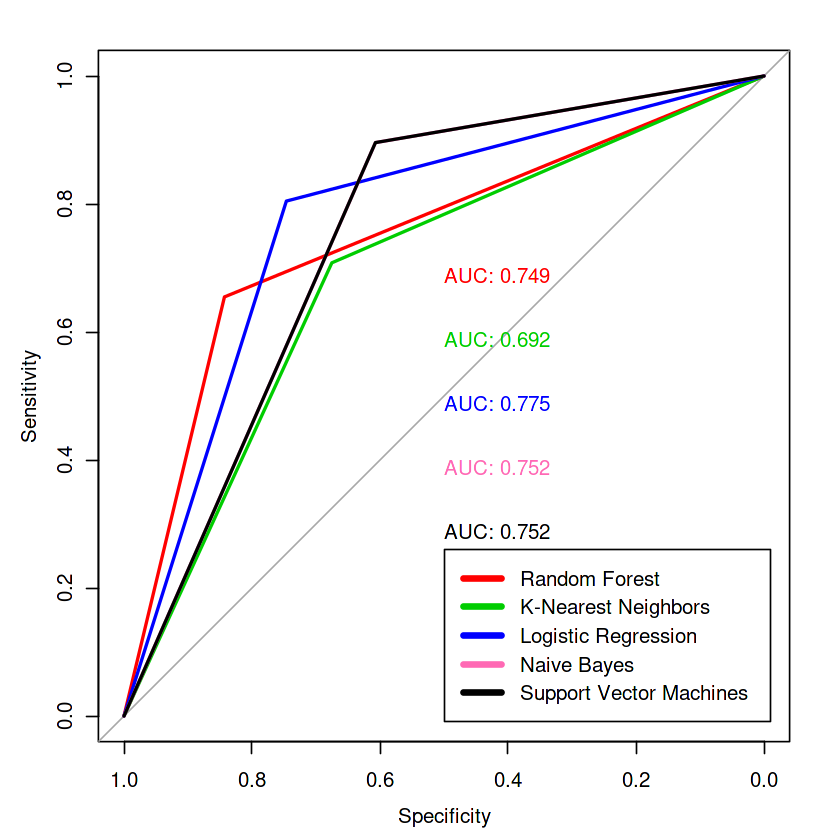

In [28]:
plot.roc(test_df$Churn , as.numeric(rf_predict_test) , print.auc = TRUE , col = 'red' , print.auc.y = 0.7)
plot.roc(test_df$Churn , as.numeric(knn_predict_test) , print.auc = TRUE , col = 'green3' , add = TRUE , print.auc.y = 0.6 )
plot.roc(test_df$Churn , as.numeric(logistic_predict_test) , print.auc = TRUE , col = 'blue', add = TRUE , print.auc.y = 0.5)
plot.roc(test_df$Churn , as.numeric(nb_predict_test) , print.auc = TRUE , col = 'hotpink', add = TRUE , print.auc.y = 0.4)
plot.roc(test_df$Churn , as.numeric(svm_predict_test) , print.auc = TRUE , col = 'black', add = TRUE ,print.auc.y = 0.3)
legend(0.5 , 0.26, legend = c("Random Forest" , "K-Nearest Neighbors" , "Logistic Regression" , "Naive Bayes" , "Support Vector Machines") , col = c("red","green3","blue","hotpink","black") ,lwd = 4)

#### The greatest AUC value was for Logistic Regression (AUC = 0.775).

#### Using the function **coef()** to extracts model coefficients from logistic_model.

In [29]:
coef(logistic_model$finalModel,logistic_model$bestTune$lambda)

28 x 1 sparse Matrix of class "dgCMatrix"
                                                s1
(Intercept)                          -1.108637e-01
SeniorCitizen1                        9.020206e-02
PartnerYes                           -1.104894e-02
DependentsYes                        -7.297449e-02
tenure                               -7.269693e-01
MultipleLinesNo phone service         1.341675e-01
MultipleLinesYes                      1.519760e-01
InternetServiceFiber optic            4.201140e-01
InternetServiceNo                    -1.718058e-01
OnlineSecurityNo internet service    -1.896113e-16
OnlineSecurityYes                    -1.249025e-01
OnlineBackupNo internet service      -3.978948e-02
OnlineBackupYes                      -6.649972e-02
DeviceProtectionNo internet service  -2.110738e-02
DeviceProtectionYes                   .           
TechSupportNo internet service       -5.143523e-18
TechSupportYes                       -1.213672e-01
StreamingTVNo internet service       -5.

## **9. Conclusion**

#### The best model of telco customer churn prediction is Logistic Regression with equation 
#### LOG(Churn) = -1.108637e-01 + 9.020206e-02x**SeniorCitizen1** - 1.104894e-02x**PartnerYes** - 7.297449e-02x**DependentsYes** - 7.269693e-01x**tenure** + 1.341675e-01x**MultipleLinesNo phone service** + 1.519760e-01x**MultipleLinesYes** + 4.201140e-01x**InternetServiceFiber optic** - 1.718058e-01x**InternetServiceNo** - 1.896113e-16x**OnlineSecurityNo internet service** - 1.249025e-01x**OnlineSecurityYes** - 3.978948e-02x**OnlineBackupNo internet service** - 6.649972e-02x**OnlineBackupYes** - 2.110738e-02x**DeviceProtectionNo internet service** - 5.143523e-18x**TechSupportNo internet service** - 1.213672e-01x**TechSupportYes** - 5.809536e-03x**StreamingTVNo internet service** + 1.448072e-01x**StreamingTVYes** - 9.990283e-05x**StreamingMoviesNo internet service** + 1.156635e-01x**StreamingMoviesYes** - 2.658323e-01x**ContractOne year** - 4.837048e-01x**ContractTwo year** + 1.544348e-01x**PaperlessBillingYes** - 3.201437e-02x**PaymentMethodCredit card (automatic)** + 2.072826e-01x**PaymentMethodElectronic check**
#### and the Area Under the Curve(AUC) is 77.5 %